In [27]:
import pandas as pd
import time
from datetime import datetime, timedelta
import numpy as np; np.random.seed(0)
import warnings
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_theme()
import datetime
from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns





In [28]:
df = pd.read_csv('main_dataframe.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2500 non-null   int64  
 1   Date                   2500 non-null   object 
 2   NVDA Open              2500 non-null   float64
 3   NVDA High              2500 non-null   float64
 4   NVDA Low               2500 non-null   float64
 5   NVDA Close             2500 non-null   float64
 6   NVDA Volume            2500 non-null   int64  
 7   NVDA Daily change      2500 non-null   float64
 8   NVDA Daily change Max  2500 non-null   float64
 9   AAPL Open              2500 non-null   float64
 10  AAPL High              2500 non-null   float64
 11  AAPL Low               2500 non-null   float64
 12  AAPL Close             2500 non-null   float64
 13  AAPL Volume            2500 non-null   int64  
 14  AAPL Daily change      2500 non-null   float64
 15  AAPL

In [29]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [30]:
df.describe(include='all')

,Date,NVDA Open,NVDA High,NVDA Low,NVDA Close,NVDA Volume,NVDA Daily change,NVDA Daily change Max,AAPL Open,AAPL High,...,MSFT Volume,MSFT Daily change,MSFT Daily change Max,INTC Open,INTC High,INTC Low,INTC Close,INTC Volume,INTC Daily change,INTC Daily change Max
count,2500,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,...,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000
unique,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"May 06, 2022",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,55.036220,56.007012,53.956608,55.010704,4.397544e+07,0.054706,3.062827,54.377492,54.962748,...,3.331913e+07,0.044444,1.850186,40.120048,40.553280,39.702296,40.136216,3.001400e+07,0.054467,2.060457
std,NaN,70.818638,72.240196,69.149726,70.709059,2.588744e+07,2.129932,1.887537,43.939634,44.488901,...,1.743158e+07,1.245177,1.117357,12.325563,12.510381,12.136461,12.322022,1.541830e+07,1.388051,1.251787
min,NaN,2.870000,2.910000,2.790000,2.850000,4.564400e+06,-10.580964,0.723327,13.860000,14.270000,...,7.425600e+06,-5.924658,0.375509,19.520000,19.550000,19.230000,19.360000,5.893800e+06,-6.818865,0.476417
25%,NaN,4.930000,4.990000,4.870000,4.920000,2.748940e+07,-1.003136,1.831410,24.575000,24.805000,...,2.273332e+07,-0.599056,1.160418,30.237500,30.560000,29.950000,30.340000,2.042192e+07,-0.680199,1.308157
50%,NaN,32.700000,33.660000,31.905000,32.845000,3.759320e+07,0.007453,2.524539,36.265000,36.540000,...,2.914835e+07,0.053735,1.556730,36.555000,36.890000,36.295000,36.570000,2.645245e+07,0.057092,1.755663
75%,NaN,62.982500,63.650000,62.090000,62.995000,5.256732e+07,1.178003,3.698139,61.850000,63.377500,...,3.829908e+07,0.746700,2.189969,50.555000,51.222500,49.972500,50.627500,3.479328e+07,0.768131,2.456795


In [31]:
df.dropna(inplace = True, axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2500 non-null   object 
 1   NVDA Open              2500 non-null   float64
 2   NVDA High              2500 non-null   float64
 3   NVDA Low               2500 non-null   float64
 4   NVDA Close             2500 non-null   float64
 5   NVDA Volume            2500 non-null   int64  
 6   NVDA Daily change      2500 non-null   float64
 7   NVDA Daily change Max  2500 non-null   float64
 8   AAPL Open              2500 non-null   float64
 9   AAPL High              2500 non-null   float64
 10  AAPL Low               2500 non-null   float64
 11  AAPL Close             2500 non-null   float64
 12  AAPL Volume            2500 non-null   int64  
 13  AAPL Daily change      2500 non-null   float64
 14  AAPL Daily change Max  2500 non-null   float64
 15  TSLA

In [32]:
df.to_csv('main_dataframe.csv')

In [33]:
df['Date'] = pd.to_datetime(df['Date']).copy()
df["Date"]= pd.to_datetime(df.Date,format="%Y-%m-%d").copy()
#df['Date'] = pd.to_numeric(pd.to_datetime(df['Date'])).copy()
i = 0
df["Day"] = 0 
while i  < 2500:
    temp = pd.Timestamp(df["Date"][i])
    df['Day'][i] = temp.dayofweek
    i=i+1

C:\Users\vikto\AppData\Local\Temp/ipykernel_21772/314205087.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'][i] = temp.dayofweek


In [34]:
df.head()

,Date,NVDA Open,NVDA High,NVDA Low,NVDA Close,NVDA Volume,NVDA Daily change,NVDA Daily change Max,AAPL Open,AAPL High,...,MSFT Daily change,MSFT Daily change Max,INTC Open,INTC High,INTC Low,INTC Close,INTC Volume,INTC Daily change,INTC Daily change Max,Day
0,2022-05-06,187.36,195.12,179.90,186.75,63299300,-0.325576,8.460256,156.01,159.44,...,-0.029111,2.941719,44.49,45.15,43.84,44.30,40910000,-0.427062,2.988139,4
1,2022-05-05,198.67,199.25,185.00,188.44,62633100,-5.149242,7.702703,163.85,164.08,...,-2.868250,4.377779,45.60,45.91,44.13,44.60,52996700,-2.192982,4.033537,3
2,2022-05-04,199.23,204.00,187.51,203.34,64885500,2.062942,8.794198,159.67,166.48,...,2.615096,5.113287,45.06,46.64,44.41,46.54,44625600,3.284510,5.021392,2
3,2022-05-03,194.00,198.25,191.33,196.02,47575100,1.041237,3.616788,158.15,160.71,...,-0.767714,1.420667,44.79,45.49,44.23,45.06,40158400,0.602813,2.848745,1
4,2022-05-02,185.41,195.74,183.91,195.33,57204900,5.350305,6.432494,156.71,158.23,...,2.434194,3.156904,43.72,44.99,43.51,44.96,45446500,2.836231,3.401517,0


D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='TSLA Daily change'>

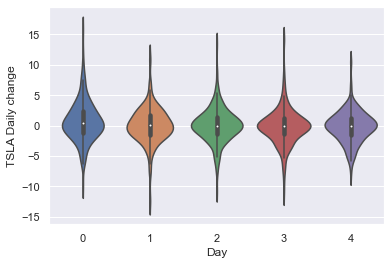

In [35]:
tdf = pd.DataFrame(df, columns = ['Day','NVDA Daily change','AAPL Daily change','AMD Daily change','MSFT Daily change','INTC Daily change','TSLA Daily change'])
tdf.drop(tdf.index[1500:2548], inplace=True)
sns.violinplot(tdf.Day , tdf['TSLA Daily change'])

<AxesSubplot:>

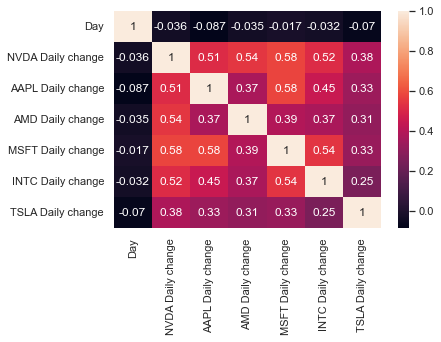

In [36]:
tdf = pd.DataFrame(df, columns = ['Day','NVDA Daily change','AAPL Daily change','AMD Daily change','MSFT Daily change','INTC Daily change','TSLA Daily change'])

#tdf.drop(tdf.index[300:2548], inplace=True)

#tdf.tail()


sns.heatmap(tdf.corr(), annot=True)

In [37]:
tdf.head()

,Day,NVDA Daily change,AAPL Daily change,AMD Daily change,MSFT Daily change,INTC Daily change,TSLA Daily change
0,4,-0.325576,0.814050,1.059996,-0.029111,-0.427062,-2.406990
1,3,-5.149242,-4.321025,-3.870968,-2.868250,-2.192982,-7.000916
2,2,2.062942,3.976952,1.262986,2.615096,3.284510,5.385313
3,1,1.041237,0.840974,1.424597,-0.767714,0.602813,0.672070
4,0,5.350305,0.797652,4.879757,2.434194,2.836231,4.899102


<AxesSubplot:>

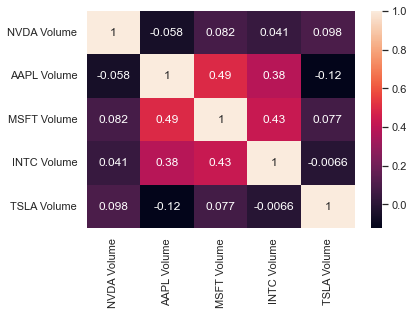

In [38]:
tdf = pd.DataFrame(df, columns = ['NVDA Volume','AAPL Volume','AMD Volume','MSFT Volume','INTC Volume','TSLA Volume'])
sns.heatmap(tdf.corr(), annot=True)


<AxesSubplot:>

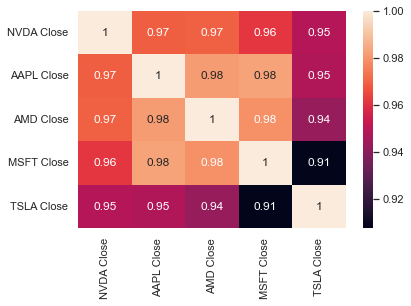

In [39]:
tdf = pd.DataFrame(df, columns = ['NVDA Close','AAPL Close','AMD Close','MSFT Close','TSLA Close'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

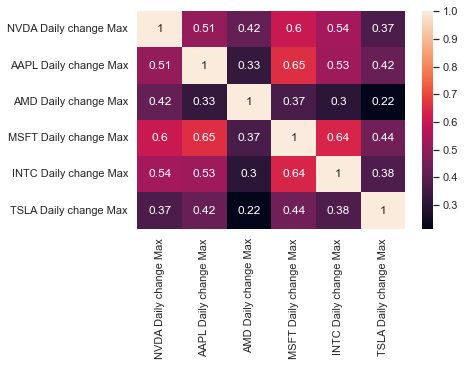

In [40]:
tdf = pd.DataFrame(df, columns = ['NVDA Daily change Max','AAPL Daily change Max','AMD Daily change Max','MSFT Daily change Max','INTC Daily change Max','TSLA Daily change Max'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

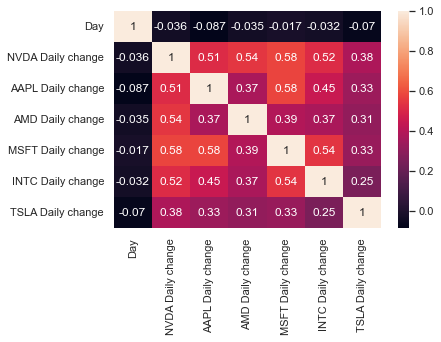

In [41]:
tdf = pd.DataFrame(df, columns = ['Day','NVDA Daily change','AAPL Daily change','AMD Daily change','MSFT Daily change','INTC Daily change','TSLA Daily change'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

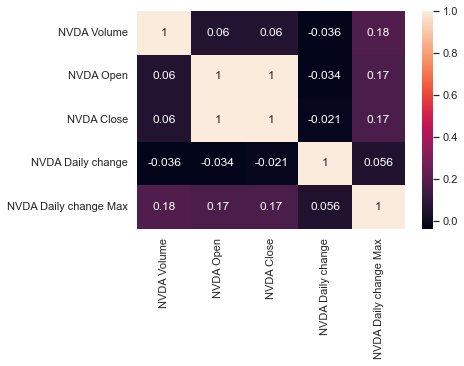

In [22]:
tdf = pd.DataFrame(df, columns = ['NVDA Volume','NVDA Open','NVDA Close','NVDA Daily change','NVDA Daily change Max'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

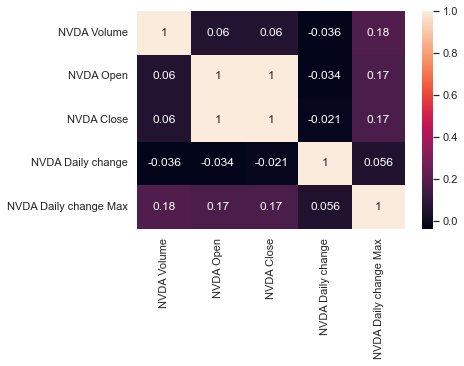

In [23]:
tdf = pd.DataFrame(df, columns = ['NVDA Volume','NVDA Open','NVDA Close','NVDA Daily change','NVDA Daily change Max'])
sns.heatmap(tdf.corr(), annot=True)